In [25]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [23]:
keras.datasets.fashion_mnist.load_data()  

4422102/4422102 [==============================] - 12s 3us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

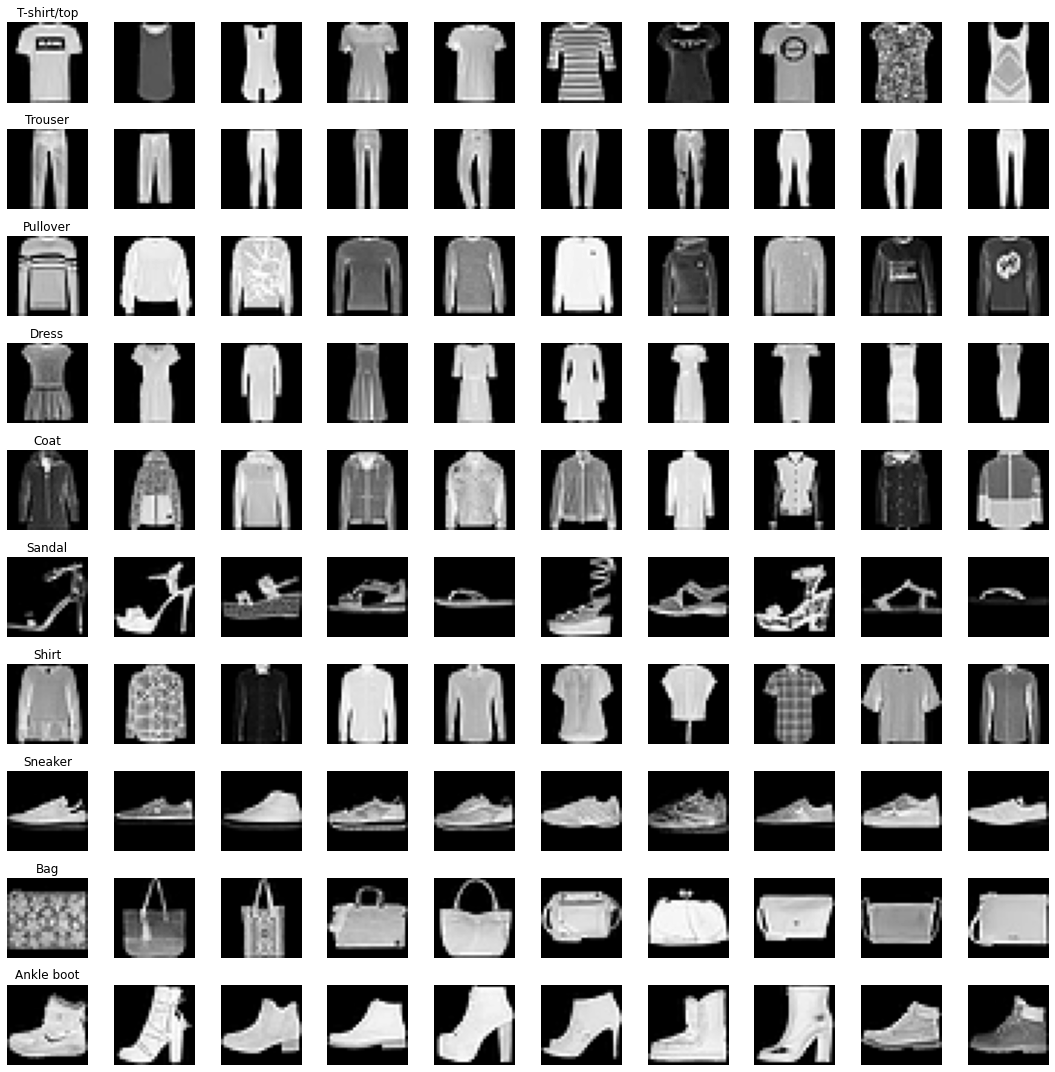

In [29]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load the FashionMNIST dataset
(x_train, y_train), (_, _) = fashion_mnist.load_data()

# Dictionary to map class labels to class names
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Function to display 10 images from each class
def display_images_per_class(images, labels, class_names):
    num_classes = len(class_names)
    images_per_class = 10

    # Create subplots
    fig, axes = plt.subplots(num_classes, images_per_class, figsize=(15, 15))

    for i in range(num_classes):
        class_indices = np.where(labels == i)[0][:images_per_class]
        for j, idx in enumerate(class_indices):
            axes[i, j].imshow(images[idx], cmap='gray')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(class_names[i])

    plt.tight_layout()
    plt.show()

# Display 10 images from each class
display_images_per_class(x_train, y_train, class_names)


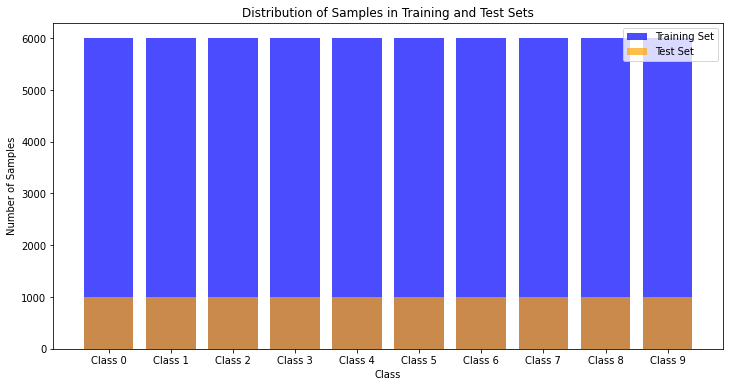

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

# Load the FashionMNIST dataset
(_, y_train), (_, y_test) = fashion_mnist.load_data()

# Calculate the class distribution in the training set
train_class_distribution = np.bincount(y_train)

# Calculate the class distribution in the test set
test_class_distribution = np.bincount(y_test)

# Number of classes
num_classes = len(train_class_distribution)

# Generate class labels
class_labels = [f'Class {i}' for i in range(num_classes)]

# Bar plot for the training set
plt.figure(figsize=(12, 6))
plt.bar(class_labels, train_class_distribution, color='blue', alpha=0.7, label='Training Set')

# Bar plot for the test set
plt.bar(class_labels, test_class_distribution, color='orange', alpha=0.7, label='Test Set')

# Add labels and legend
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples in Training and Test Sets')
plt.legend()

# Show the plot



In [32]:
from keras.datasets import fashion_mnist

# Load the FashionMNIST dataset
(_, y_train), (_, y_test) = fashion_mnist.load_data()

# Calculate the class distribution in the training set
train_class_distribution = np.bincount(y_train)

# Calculate the class distribution in the test set
test_class_distribution = np.bincount(y_test)

# Print the class distribution
print("Class Distribution in Training Set:")
for i, count in enumerate(train_class_distribution):
    print(f"Class {i}: {count} samples")

print("\nClass Distribution in Test Set:")
for i, count in enumerate(test_class_distribution):
    print(f"Class {i}: {count} samples")


Class Distribution in Training Set:
Class 0: 6000 samples
Class 1: 6000 samples
Class 2: 6000 samples
Class 3: 6000 samples
Class 4: 6000 samples
Class 5: 6000 samples
Class 6: 6000 samples
Class 7: 6000 samples
Class 8: 6000 samples
Class 9: 6000 samples

Class Distribution in Test Set:
Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 1000 samples
Class 5: 1000 samples
Class 6: 1000 samples
Class 7: 1000 samples
Class 8: 1000 samples
Class 9: 1000 samples


# 3

###  softmax : The softmax function is a mathematical function that takes a vector of arbitrary real-valued scores (or logits) and transforms them into a probability distribution. 

# 4

In [34]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.optimizers import SGD

# Load the FashionMNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], -1))   # Flatten the images and normalize
x_test = x_test.reshape((x_test.shape[0], -1)) 
y_train = to_categorical(y_train, 10)  # One-hot encode the labels
y_test = to_categorical(y_test, 10)

# Create a sequential model
model = Sequential()

# Add the input layer with input shape 28*25
model.add(Dense(units=256, input_shape=(28*28,), activation='relu'))

# Add the first hidden layer
model.add(Dense(units=256, activation='relu'))

# Add the second hidden layer
model.add(Dense(units=64, activation='relu'))

# Add the output layer with softmax activation for multi-class classification
model.add(Dense(units=10, activation='softmax'))

# Compile the model
sgd = SGD(lr=0.001) 
model.compile(optimizer=sgd , loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4766 - accuracy: 0.7557 - val_loss: 0.5833 - val_accuracy: 0.7919
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5028 - accuracy: 0.8195 - val_loss: 0.5066 - val_accuracy: 0.8222
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4464 - accuracy: 0.8373 - val_loss: 0.4867 - val_accuracy: 0.8293
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4129 - accuracy: 0.8492 - val_loss: 0.4655 - val_accuracy: 0.8368
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3917 - accuracy: 0.8546 - val_loss: 0.4593 - val_accuracy: 0.8348
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3731 - accuracy: 0.8619 - val_loss: 0.4411 - val_accuracy: 0.8422
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3588 - accuracy: 0.8662 - val_loss: 0.4388 - val_accuracy:

# 5

In [47]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.optimizers import SGD

# Load the FashionMNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0  # Flatten the images and normalize
x_test = x_test.reshape((x_test.shape[0], -1)) / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encode the labels
y_test = to_categorical(y_test, 10)

# Create a sequential model
model = Sequential()

# Add the input layer with input shape 28*25
model.add(Dense(units=256, input_shape=(28*28,), activation='relu'))

# Add the first hidden layer
model.add(Dense(units=256, activation='relu'))

# Add the second hidden layer
model.add(Dense(units=64, activation='relu'))

# Add the output layer with softmax activation for multi-class classification
model.add(Dense(units=10, activation='softmax'))

# Compile the model
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd , loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5439 - accuracy: 0.8032 - val_loss: 0.4093 - val_accuracy: 0.8514
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3894 - accuracy: 0.8575 - val_loss: 0.3887 - val_accuracy: 0.8569
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3525 - accuracy: 0.8701 - val_loss: 0.3518 - val_accuracy: 0.8708
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3243 - accuracy: 0.8783 - val_loss: 0.3960 - val_accuracy: 0.8551
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3058 - accuracy: 0.8856 - val_loss: 0.3407 - val_accuracy: 0.8759
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2892 - accuracy: 0.8907 - val_loss: 0.3487 - val_accuracy: 0.8712
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2751 - accuracy: 0.8950 - val_loss: 0.3739 - val_accuracy:

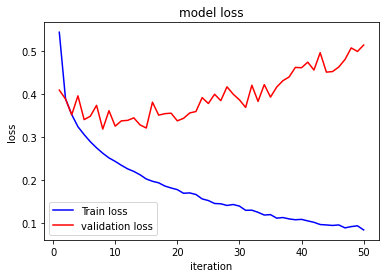

In [50]:
# Plot Losses VS Iteration
history_dict = history.history
epochs = range(1,len(history_dict['loss'])+1)
plt.title('model loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(epochs,history_dict['loss'],'b',label = "Train loss")
plt.plot(epochs,history_dict['val_loss'],'r',label = "validation loss")
plt.legend()
plt.show()

In [ ]:

# Plot acc VS Iteration
epochs = range(1,len(history_dict['accuracy'])+1)
plt.xlabel('iteration')
plt.ylabel('acc')
plt.plot(epochs,history_dict['accuracy'],'bo',label = "acc")
plt.plot(epochs, history_dict['val_accuracy'],'b',label = "validation_acc")
plt.legend()
plt.show()

### 1: Increase the number of neurons
### 2:Increase the number of layers
### 3: Adjust Activation Function
### 4 : Use Dropout: to prevent overfitting

# 6

313/313 [==============================] - 0s 1ms/step


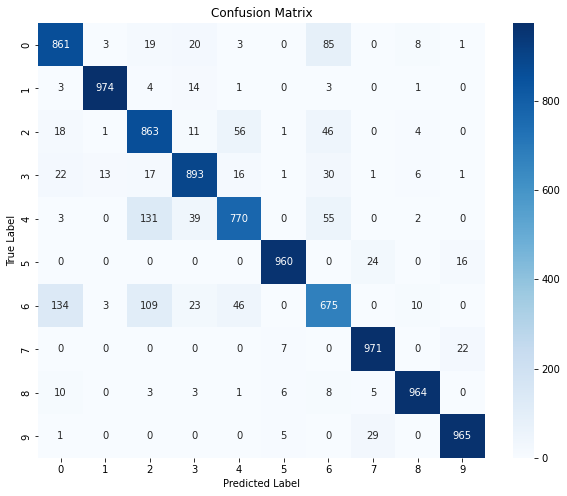

In [66]:
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.utils import to_categorical
# Predict probabilities for each class
y_probs = model.predict(x_test)

# Get the predicted labels
y_pred = np.argmax(y_probs, axis=1)

# Get the true labels
y_true = np.argmax(y_test, axis=1)

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 7

In [67]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.optimizers import Adam

# Load the FashionMNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0  # Flatten the images and normalize
x_test = x_test.reshape((x_test.shape[0], -1)) / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encode the labels
y_test = to_categorical(y_test, 10)

# Create a sequential model
model = Sequential()

# Add the input layer with input shape 28*25
model.add(Dense(units=256, input_shape=(28*28,), activation='relu'))

# Add the first hidden layer
model.add(Dense(units=256, activation='relu'))

# Add the second hidden layer
model.add(Dense(units=64, activation='relu'))

# Add the output layer with softmax activation for multi-class classification
model.add(Dense(units=10, activation='softmax'))

# Compile the model
adam = Adam(lr=0.001) 
model.compile(optimizer=adam , loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/50


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1500/1500 [==============================] - 5s 3ms/step - loss: 0.4963 - accuracy: 0.8201 - val_loss: 0.4076 - val_accuracy: 0.8516
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3748 - accuracy: 0.8626 - val_loss: 0.4096 - val_accuracy: 0.8510
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3361 - accuracy: 0.8764 - val_loss: 0.3586 - val_accuracy: 0.8734
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3135 - accuracy: 0.8837 - val_loss: 0.3388 - val_accuracy: 0.8771
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2924 - accuracy: 0.8907 - val_loss: 0.3380 - val_accuracy: 0.8771
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2801 - accuracy: 0.8962 - val_loss: 0.3237 - val_accuracy: 0.8861
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2629 - accuracy: 0.9002 - val_loss: 0.3227 - val_accuracy: 0.8896
Epo

313/313 [==============================] - 0s 1ms/step


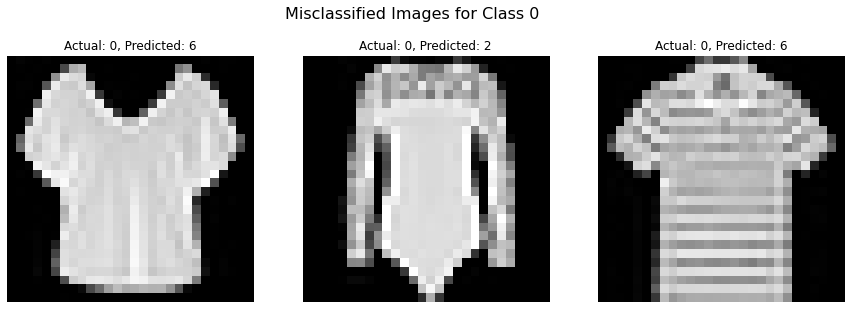

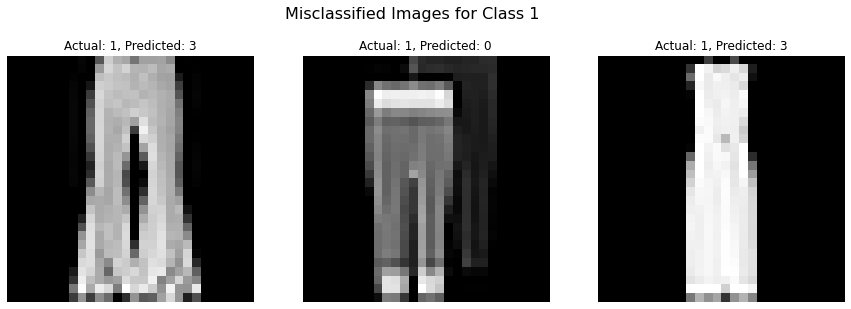

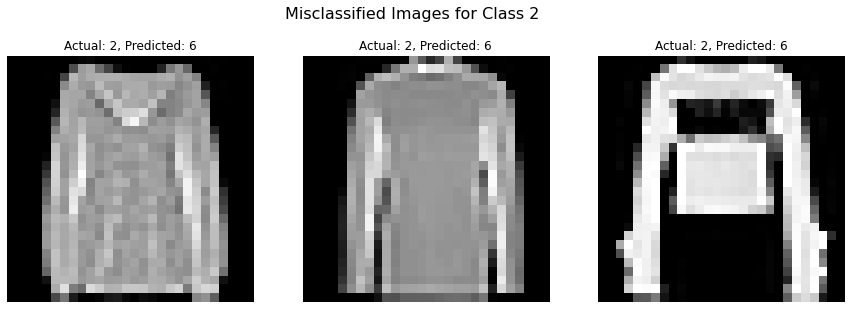

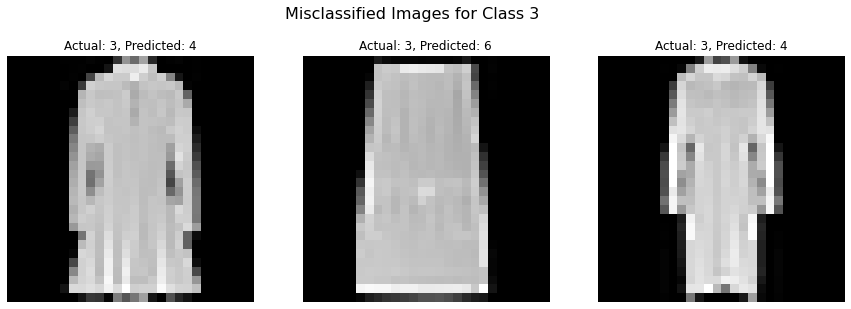

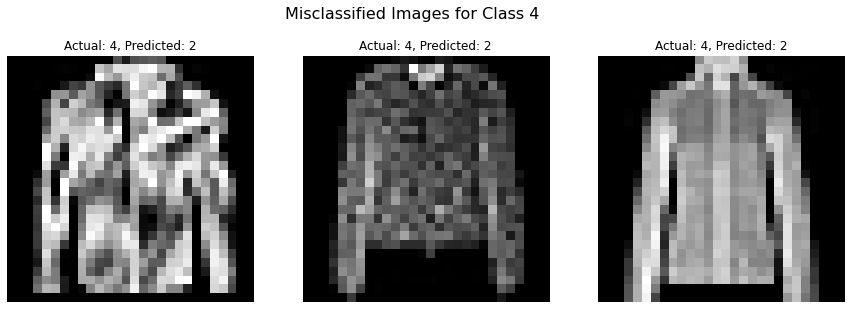

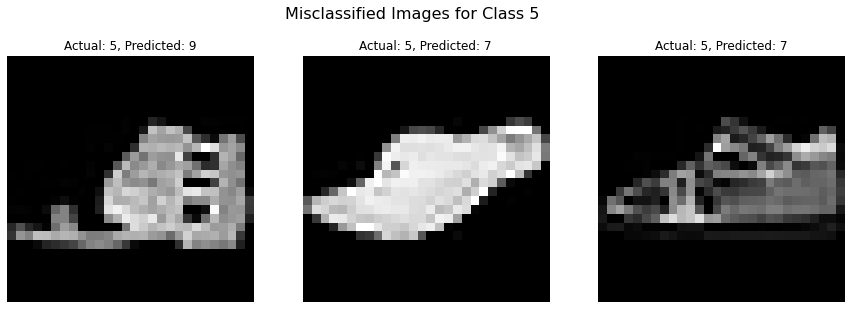

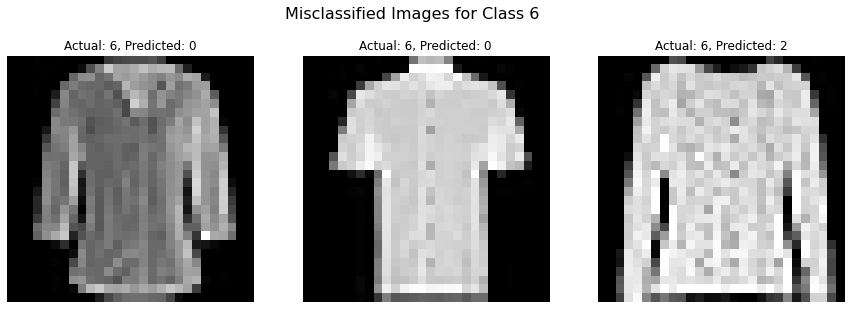

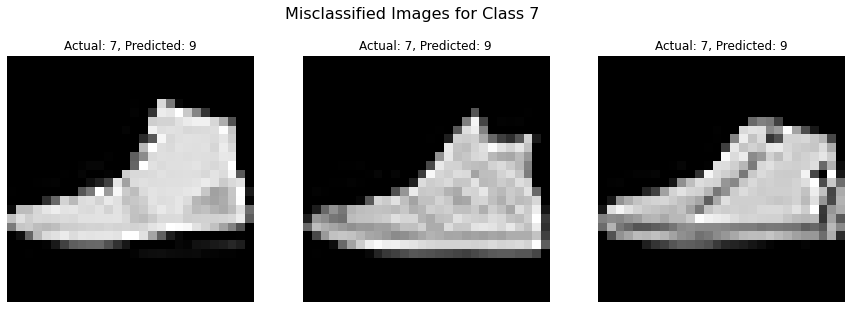

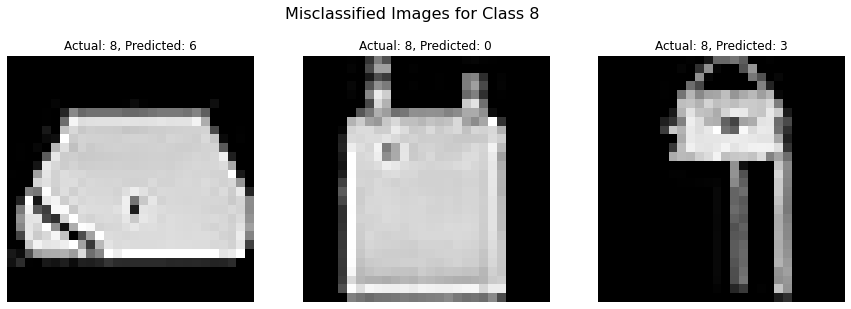

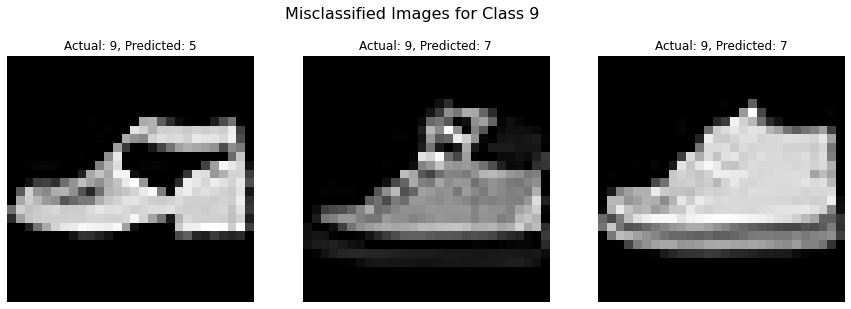

In [69]:
# Get predicted probabilities for the test set
y_probs = model.predict(x_test)

# Get predicted labels
y_pred = np.argmax(y_probs, axis=1)

# Display 3 misclassified images for each class
classes = np.unique(y_test.argmax(axis=1))

for class_label in classes:
    misclassified_indices = np.where((y_test.argmax(axis=1) == class_label) & (y_pred != class_label))[0][:3]
    
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Misclassified Images for Class {class_label}', fontsize=16)
    
    for i, idx in enumerate(misclassified_indices):
        plt.subplot(1, 3, i+1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f'Actual: {class_label}, Predicted: {y_pred[idx]}')
        plt.axis('off')
    
    plt.show()